### <div class="alert alert-info" align="center">Build a predictive model to determine which customers are likely to churn (leave the bank)</div>

- Importing Required Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.facecolor':'lightblue'}) 

import warnings
warnings.filterwarnings("ignore")

- Loading Dataset

In [2]:
df=pd.read_csv("BankChurn_Data.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Dropping columns which are not required for our modelling

In [3]:
df.drop(["CustomerId","Surname"],axis=1,inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Structure of Data

In [5]:
df.shape

(10000, 11)

In [6]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

- Missing value and junk value treatment

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
c=df.select_dtypes(include="object").columns.tolist()

In [11]:
for i in c:
    print(df[i].value_counts())
    print("-----")

France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64
-----
Male      5457
Female    4543
Name: Gender, dtype: int64
-----


- Replacing wrongly spelled country names with proper names

In [12]:
f=["france","fra"]
g=["ger","germany","gernamy","GERMANY"]
s=["espanio","spain"]
a=[f,g,s]
b=["France","Germany","Spain"]
for i,j in zip(a,b):
    df["Geography"].replace(i,j,inplace=True)

### <div class="alert alert-info" align="center">Exploratory Data Analysis</div>

- Univariate Analysis

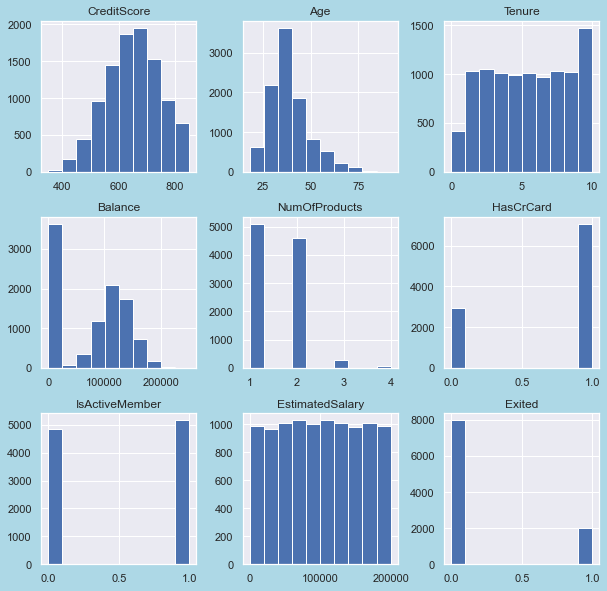

In [14]:
df.hist(figsize=(10,10))
plt.show()

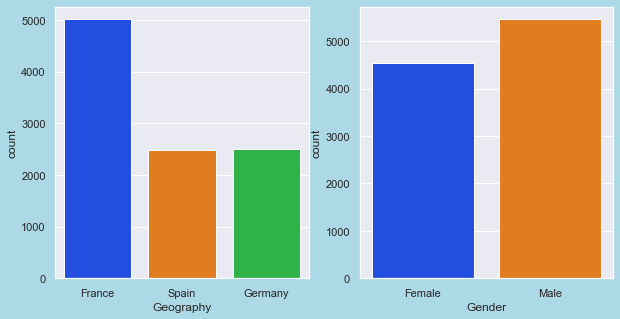

In [15]:
n=1
plt.figure(figsize=(10,5))
for i in c:
    plt.subplot(1,2,n)
    sns.countplot(data=df,x=i,palette="bright")
    n=n+1

### <div class="alert alert-info">Observations</div>
From Univariate Analysis we can observe
- Distributions of various numerical columns: There are no extreme values
- Count of male is higher and also France is higher
- There are around 1:4 left customers per existing customers
- Many have nill balance

- Bivariate Analysis and Multivariate Analysis

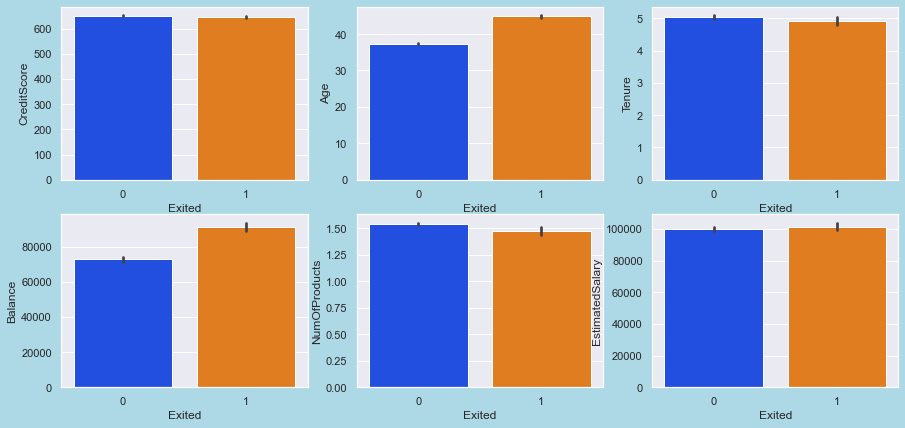

In [16]:
n=1
plt.figure(figsize=(15,7))
for i in  ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]:
    plt.subplot(2,3,n)
    sns.barplot(data=df,x="Exited",y=i,palette="bright")
    n=n+1

### <div class="alert alert-info">Observations</div>
- Mean age of left customers is higher
- Mean balance of left customers is higher
- For the rest of features above exited doesnt have affect

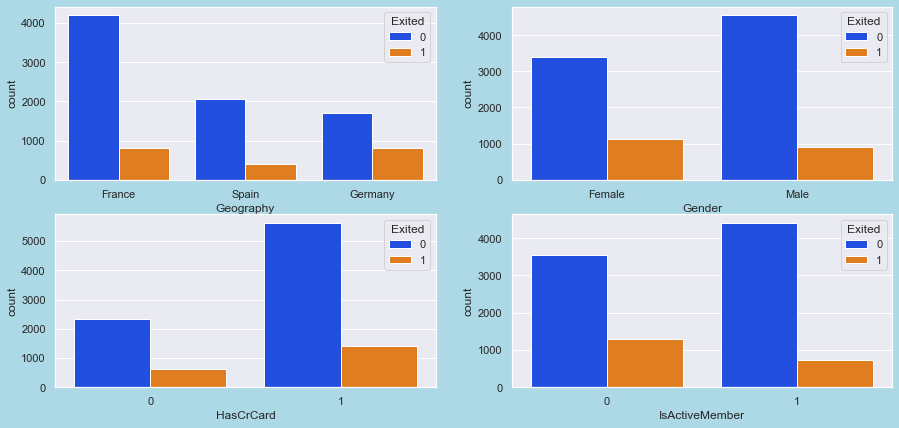

In [17]:
n=1
plt.figure(figsize=(15,7))
for i in  ["Geography","Gender","HasCrCard","IsActiveMember"]:
    plt.subplot(2,2,n)
    sns.countplot(data=df,hue="Exited",x=i,palette="bright")
    n=n+1

<AxesSubplot:xlabel='Gender', ylabel='Exited'>

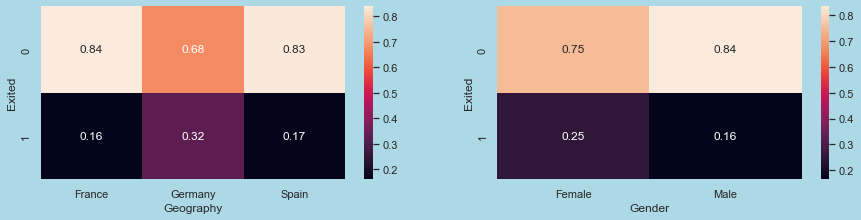

In [18]:
plt.figure(figsize=(15,7))
plt.subplot(221)
sns.heatmap(pd.crosstab(index=df["Exited"],columns=df["Geography"],normalize="columns"),annot=True)
plt.subplot(222)
sns.heatmap(pd.crosstab(index=df["Exited"],columns=df["Gender"],normalize="columns"),annot=True)

### <div class="alert alert-info">Observations</div>
- Germany has high churn rate
- Females have high churn rate
- count of left customers is high in France,and among males,and who has  credit card

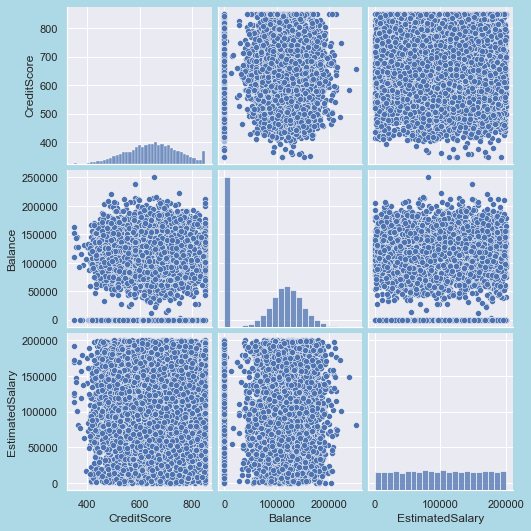

In [19]:
sns.pairplot(df[["CreditScore","Balance","EstimatedSalary"]])

- There is no such correlation exists among these features

#### &#10148; Feature Engineering

- Label Encoding to convert categorical into numerical

In [20]:
for i in c:
    df[i]=LabelEncoder().fit_transform(df[i])

In [21]:
df1=df.copy()

- Correlation Matrix

<AxesSubplot:>

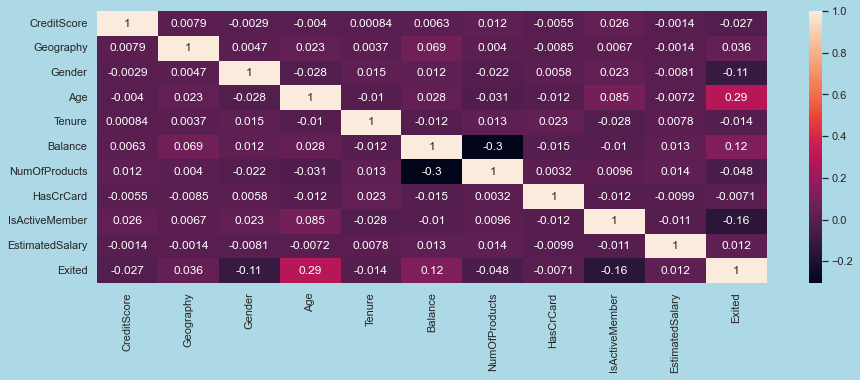

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

### <div class="alert alert-info">Observations</div>
 As observed from from EDA and this correlation matrix:
 - Age has impact on churn and it is positively correlated 
 - Balance and Gender and active member are other feature to be correlated with exited

- Feature Scaling

In [23]:
x=df.iloc[:,:-1]
y=df["Exited"]

In [24]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

- Selecting the below 5 features for modelling on the basis of their correlation and observations from EDA

In [25]:
x=x[["Age","Gender","Balance","IsActiveMember","Geography"]]

- Train test split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

#### <div class="alert alert-info" align="center">Selecting best hyperparameters and algorithm </div>

- Defining the cross validation method 

In [208]:
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=10,random_state=1)

- Logistic Regression

In [309]:
model1=LogisticRegression()
b=cross_validate(model1,x,y,cv=cv,scoring=["accuracy","f1"])
f11=b["test_f1"].mean()
score1=b["test_accuracy"].mean()
f11,score1

(0.27010820716925, 0.80684)

- Naive Bayes Classifier

In [311]:
model2=GaussianNB()
b2=cross_validate(model2,x,y,cv=cv,scoring=["accuracy","f1"])
f12=b2["test_f1"].mean()
score2=b2["test_accuracy"].mean()
f12,score2

(0.24898445522542012, 0.8071200000000002)

- Random Forest Classifier

In [338]:
model3=RandomForestClassifier()
b3=cross_validate(model3,x,y,cv=cv,scoring=["accuracy","f1"])
f13=b3["test_f1"].mean()
score3=b3["test_accuracy"].mean()
f13,score3

(0.4412293652202588, 0.8064799999999999)

- Random Forest tuning hyperparameters with Gridsearchcv

In [324]:
model4=RandomForestClassifier()
p={'max_depth':[6,7,8,9,10],'min_samples_leaf':[4,5,6,7],'n_estimators':[50,100]}
gs=GridSearchCV(model4,param_grid=p,cv=10,n_jobs=-1,scoring=["accuracy","f1"],refit="accuracy")
gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [4, 5, 6, 7],
                         'n_estimators': [50, 100]},
             refit='accuracy', scoring=['accuracy', 'f1'])

In [330]:
para=gs.best_params_
para

{'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 50}

In [329]:
model4=RandomForestClassifier(max_depth=8,min_samples_leaf=5,n_estimators=50)
b4=cross_validate(model4,x,y,cv=cv,scoring=["accuracy","f1"])
f14=b4["test_f1"].mean()
score4=b4["test_accuracy"].mean()
f14,score4

(0.45243087296009643, 0.83503)

- Boosting with Adaboost classifier

In [318]:
model5=AdaBoostClassifier()
b5=cross_validate(model5,x,y,cv=cv,scoring=["accuracy","f1"])
f15=b5["test_f1"].mean()
score5=b5["test_accuracy"].mean()
f15,score5

(0.4535277700198336, 0.8329899999999999)

- Stacking with base models as:Naive bayes classifier,Decision tree classifier,support vector machine and meta model as Logistic regression

In [335]:
level0=[("nb",GaussianNB()),("dtc",DecisionTreeClassifier()),("svc",SVC())]
level1=LogisticRegression()
model6=StackingClassifier(level0,level1)
b6=cross_validate(model6,x,y,cv=10,scoring=["accuracy","f1"])
f16=b6["test_f1"].mean()
score6=b6["test_accuracy"].mean()
f16,score6

(0.40283591123685036, 0.834)

#### <div class="alert alert-info" align="center">Performance Summary of various Algorithms</div>

In [339]:
d={"Classifier used":["Logistic Regression","Naive Bayes","Random Forest","Random Forest with tuning","AdaBoost","Stacking"],"Accuracy":[score1,score2,score3,score4,score5,score6],"F1 Score":[f11,f12,f13,f14,f15,f16]}

In [340]:
perf=pd.DataFrame(d)
perf=perf.sort_values("Accuracy",ascending=False).reset_index().drop("index",axis=1)
perf.index=np.arange(1,len(perf)+1)
perf

,Classifier used,Accuracy,F1 Score
1,Random Forest with tuning,0.83503,0.452431
2,Stacking,0.83400,0.402836
3,AdaBoost,0.83299,0.453528
4,Naive Bayes,0.80712,0.248984
5,Logistic Regression,0.80684,0.270108
6,Random Forest,0.80648,0.441229


- Checked accuracy for different baseline models like Logistic Regression,Naive bayes and got accuracy of around 80%
- To build more accurate models, performed ensemble approaches like Random Forest,AdaBoost and Stacking for Classification
- All the ensemble approaches provided good accuracy for classfying customers 
- Also checked their F1 score since accuracy may mask the imbalance in the labels
- Performed hyperparameter tuning for random forest to check how much performance of classifier can be improved
- Selected the best among all Random Forest with tuned parameters for our final modelling which has accuracy of 84% for different pairs 

#### <div class="alert alert-info" align="center"> Building Classifier Model using Random Forest</div>

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
x=df[["Age","Gender","Balance","IsActiveMember","Geography"]]
y=df["Exited"]

In [15]:
x.head()

,Age,Gender,Balance,IsActiveMember,Geography
0,42,Female,0.00,1,France
1,41,Female,83807.86,1,Spain
2,42,Female,159660.80,0,France
3,39,Female,0.00,0,France
4,43,Female,125510.82,1,Spain


In [37]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')


In [24]:
trf1=ColumnTransformer([("encoder",OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,4])],remainder="passthrough")
trf2=ColumnTransformer([("scaling",MinMaxScaler(),slice(0,8))])
trf3=RandomForestClassifier(max_depth=8,min_samples_leaf=5,n_estimators=50)

In [25]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [26]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('trf3',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=5,
                                        n_estimators=50))])

In [27]:
pipe.score(x_train,y_train)

0.8484285714285714

In [29]:
y_pred=pipe.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

In [30]:
ydf=pd.DataFrame({"y actual":y_test,"y predicted":y_pred})
ydf.head()

,y actual,y predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0


In [31]:
print(" Accuracy : ",accuracy,"\n","Recall   : ",recall,"\n","Precision: ",precision,"\n","F1 score : ",f1)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

 Accuracy :  0.8423333333333334 
 Recall   :  0.339041095890411 
 Precision:  0.6947368421052632 
 F1 score :  0.4556962025316456
Confusion Matrix:
 [[2329   87]
 [ 386  198]]


Area under ROC curve: 0.8007323465708064


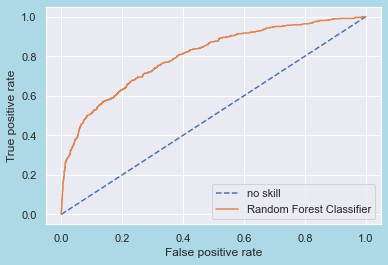

In [33]:
ns_prob=[0 for i in range(len(y_test))]
lr_prob=pipe.predict_proba(x_test)[:,1]

ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

print("Area under ROC curve:",roc_auc_score(y_test,lr_prob))

plt.plot(ns_fpr,ns_tpr,linestyle='--',label="no skill")
plt.plot(lr_fpr,lr_tpr,label="Random Forest Classifier")

plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()


- AOC here shows ability of our model to distinguish among labels
- Area Under the ROC Curve is around 80% which basically is the quality indicator for binary classification.
- This is much higher than no skill line which has 50% area under that. 

- Built model to predict customer churn using Random Forest Classifier after selecting the best hyperparameters.
- Got a good Accuracy i.e. (total correct prediction/all prediction) score of around 84% and F1 score (harmonic mean of recall and precision) as 45%

In [35]:
pickle.dump(pipe,open('classification.pkl','wb'))

In [36]:
model=pickle.load(open('classification.pkl','rb'))

In [40]:
result=model.predict(np.array([42,'Female',0,1,'France']).reshape(1,5))

In [42]:
result[0]

0